
Number of PCA components retaining 95% variance: 17

First 5 Rows of PCA Components:
   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0         0.042868        -0.267517         0.066664         0.200043   
1         0.025290        -0.077462         0.037293        -0.199508   
2         0.128062         0.745470         0.089583         0.061089   
3         0.026273        -0.024588        -0.213639        -0.115453   
4         0.129046         0.798345        -0.161349         0.145144   

   PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0        -0.017976         0.031889         0.020243        -0.003967   
1        -0.022114         0.022644         0.015936        -0.007632   
2        -0.082833         0.030417         0.025386        -0.007156   
3         0.124499         0.004945        -0.003416         0.000082   
4         0.063780         0.012717         0.006034         0.000558   

   PCA_Component_9  PCA_Component_10

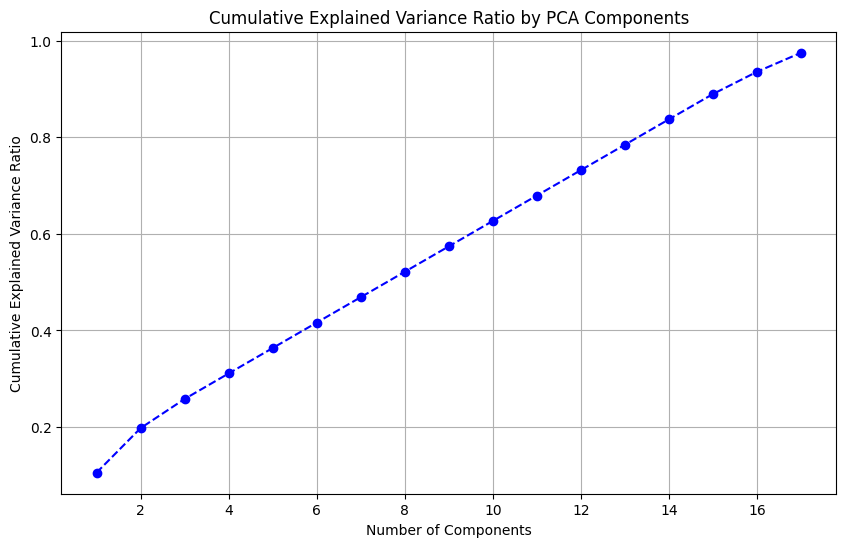

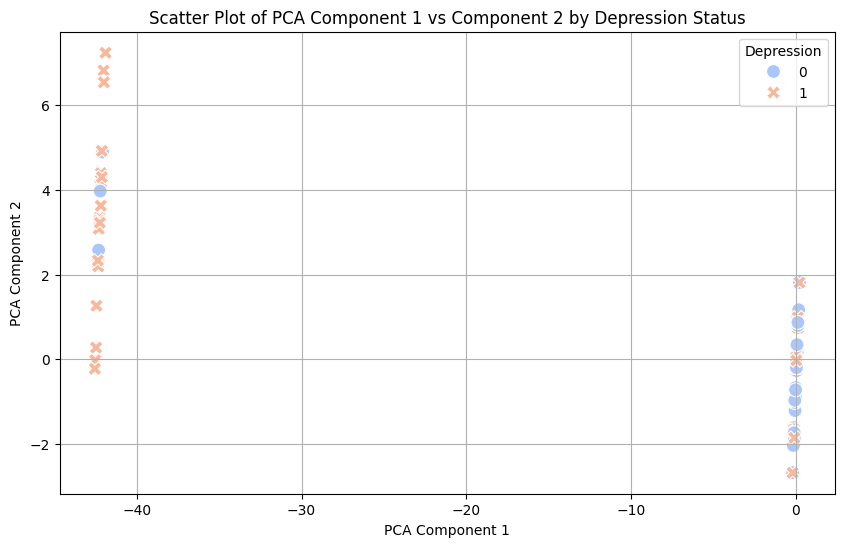

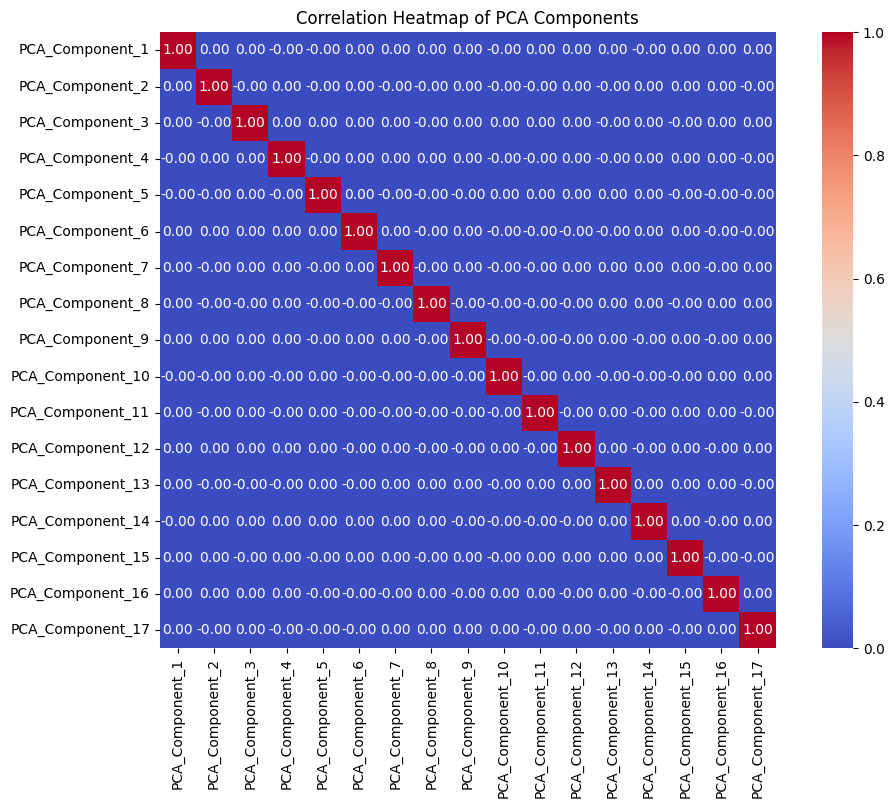


Dataset with PCA components saved as 'pca_reduced_student_depression.csv'


In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os


try:
    df = pd.read_csv('features_engineered_student_depression.csv')
except FileNotFoundError:
    print("Error: 'features_engineered_student_depression.csv' not found. Please run the polynomial features step first.")
    exit()

# Dimensionality Reduction using PCA/ Identify one-hot encoded and categorical columns for PCA
categorical_columns = [col for col in df.columns if col.startswith('profession_') or col.startswith('degree_')]

# Verify that the required columns exist
if not categorical_columns:
    print("Error: No categorical columns (profession_* or degree_*) found for PCA.")
    exit()

# Extract the categorical columns for PCA
X_categorical = df[categorical_columns]

# Standardize the features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_categorical)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Get the number of components selected
n_components = X_pca.shape[1]
print(f"\nNumber of PCA components retaining 95% variance: {n_components}")

# Create a DataFrame with the PCA components
pca_columns = [f'PCA_Component_{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=df.index)

# Combine the original dataset with the PCA components, dropping the original categorical columns
df_reduced = pd.concat([df.drop(columns=categorical_columns), pca_df], axis=1)

# Handle any NaNs that might arise
df_reduced = df_reduced.fillna(0)

# Display the first 5 rows of the PCA components
print("\nFirst 5 Rows of PCA Components:")
print(pca_df.head())

# Summary statistics of PCA components
print("\nSummary of PCA Components:")
print(pca_df.describe())

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_5'
os.makedirs(output_dir, exist_ok=True)

# EDA Visualization 1: Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'pca_explained_variance.png'))
plt.show()

# EDA Visualization 2: Scatter Plot of First Two PCA Components by Depression Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_Component_1', y='PCA_Component_2', hue='Depression', style='Depression', data=df_reduced, palette='coolwarm', s=100)
plt.title('Scatter Plot of PCA Component 1 vs Component 2 by Depression Status')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'pca_scatter_depression.png'))
plt.show()

# EDA Visualization 3: Correlation Heatmap of PCA Components
plt.figure(figsize=(12, 8))
sns.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of PCA Components')
plt.savefig(os.path.join(output_dir, 'pca_correlation_heatmap.png'))
plt.show()

# Save the updated dataset with PCA components
df_reduced.to_csv('pca_reduced_student_depression.csv', index=False)
print("\nDataset with PCA components saved as 'pca_reduced_student_depression.csv'")